# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

# TASK,PART 1

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [5]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [6]:
X=df.iloc[:,0].values
np.shape(X)

(804,)

In [7]:
Y=df.iloc[:,1].values
Y
np.shape(Y)

(804,)

Text(0, 0.5, 'Mileage')

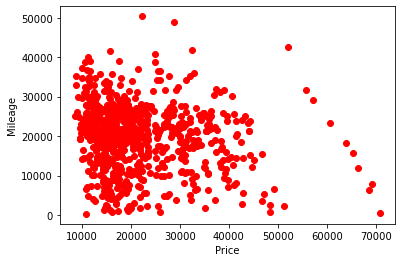

In [8]:
 plt.scatter(X,Y,color='r')
plt.xlabel("Price")
plt.ylabel("Mileage")

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=1/3, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression


In [12]:
lr=LinearRegression()
lr

LinearRegression()

In [13]:
lr.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [14]:
y_pred=lr.predict(X_test.reshape(-1,1))


In [15]:
m=lr.coef_[0]
b=lr.intercept_
print("slope=",m, "intercept=",b)

slope= -0.14185537122964018 intercept= 23320.036859744705


In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6327.090406010429
Mean Squared Error: 67503616.15479515
Root Mean Squared Error: 8216.058431802634


# Chart the original data and the equation on the chart.

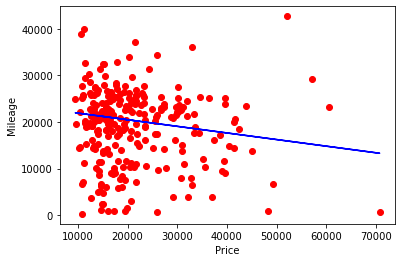

In [17]:
plt.scatter(X_test.reshape(-1,1),y_test,color='r')
plt.plot(X_test.reshape(-1,1),lr.predict(X_test.reshape(-1,1)), color='b')
plt.xlabel("Price")
plt.ylabel("Mileage")
plt.show()

# 𝑅2  score

In [18]:
lr.score(X_train.reshape(-1,1), y_train)

0.03019445441203561

In [19]:
print('Train Score: ', lr.score(X_train.reshape(-1,1), y_train))  
print('Test Score: ', lr.score(X_test.reshape(-1,1), y_test))  

Train Score:  0.03019445441203561
Test Score:  -0.029496220045781563


In [20]:
lr = sm.OLS(y_train,sm.add_constant(X_train))

model_results = lr.fit()

model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     16.63
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           5.25e-05
Time:                        11:19:01   Log-Likelihood:                -5582.8
No. Observations:                 536   AIC:                         1.117e+04
Df Residuals:                     534   BIC:                         1.118e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.332e+04    823.732     28.310      0.000    2.17e+04    2.49e+04
x1            -0.1419      0.035     -4.077      0.000      -0.210      -0.074
==============================================================================
Omnibus:                        3.019   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                3.367
Skew:                          -0.013   Prob(JB):                        0.186
Kurtosis:                       3.387   Cond. No.                     5.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""